<a href="https://colab.research.google.com/github/sdelozi/Diabetes-Prediction/blob/main/Dia_012.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/diabetes_012_health_indicators_BRFSS2015 (1).csv")

FileNotFoundError: [Errno 2] No such file or directory: '/content/diabetes_012_health_indicators_BRFSS2015 (1).csv'

In [ ]:
df = data.copy()
print(df.shape)
df.head()

(253680, 22)


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
print(df.info())
print(" ")
print(df.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
# Set all columns except for "BMI" to int type
columns_to_convert = df.columns.difference(['BMI'])
df[columns_to_convert] = df[columns_to_convert].astype(int)

print(df.info())
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  int64  
 1   HighBP                253680 non-null  int64  
 2   HighChol              253680 non-null  int64  
 3   CholCheck             253680 non-null  int64  
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  int64  
 6   Stroke                253680 non-null  int64  
 7   HeartDiseaseorAttack  253680 non-null  int64  
 8   PhysActivity          253680 non-null  int64  
 9   Fruits                253680 non-null  int64  
 10  Veggies               253680 non-null  int64  
 11  HvyAlcoholConsump     253680 non-null  int64  
 12  AnyHealthcare         253680 non-null  int64  
 13  NoDocbcCost           253680 non-null  int64  
 14  GenHlth               253680 non-null  int64  
 15  

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40.0,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25.0,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28.0,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27.0,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24.0,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


In [ ]:
# Proportion of target classes
print("Proportion of Target Classes (Overall dataset):")
print(df['Diabetes_012'].value_counts(normalize=True),"\n")

#Checking for duplicated rows
print("Duplicate rows:", df.duplicated().sum())

duplicates_df = df[df.duplicated()]
duplicates_df['Diabetes_012'].value_counts()

Proportion of Target Classes (Overall dataset):
Diabetes_012
0    0.842412
2    0.139333
1    0.018255
Name: proportion, dtype: float64 

Duplicate rows: 23899


Diabetes_012
0    23648
2      249
1        2
Name: count, dtype: int64

In [ ]:
#Drop duplicate rows
df.drop_duplicates(inplace = True)
df.shape

(229781, 22)

In [ ]:

#df = data.copy()
print(df.shape)
df.head()

NameError: name 'df' is not defined

In [ ]:
target = ['Diabetes_012']
features_binary = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack',
                   'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']
features_ordinal = ['GenHlth', 'Age', 'Education', 'Income']
features_numerical = ['BMI', 'MentHlth', 'PhysHlth']

Proportion of Target Classes:
Diabetes_012
0    0.827114
2    0.152741
1    0.020145
Name: proportion, dtype: float64 



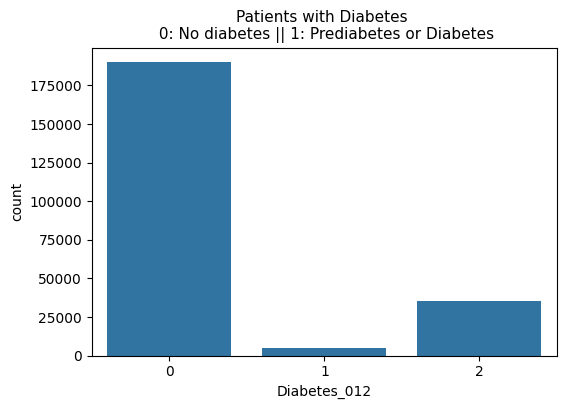

In [ ]:
print("Proportion of Target Classes:")
print(df['Diabetes_012'].value_counts(normalize=True),"\n")

# Plot distribution of target variable
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Diabetes_012'])
plt.title('Patients with Diabetes \n 0: No diabetes || 1: Prediabetes or Diabetes', fontsize=11)

plt.show()

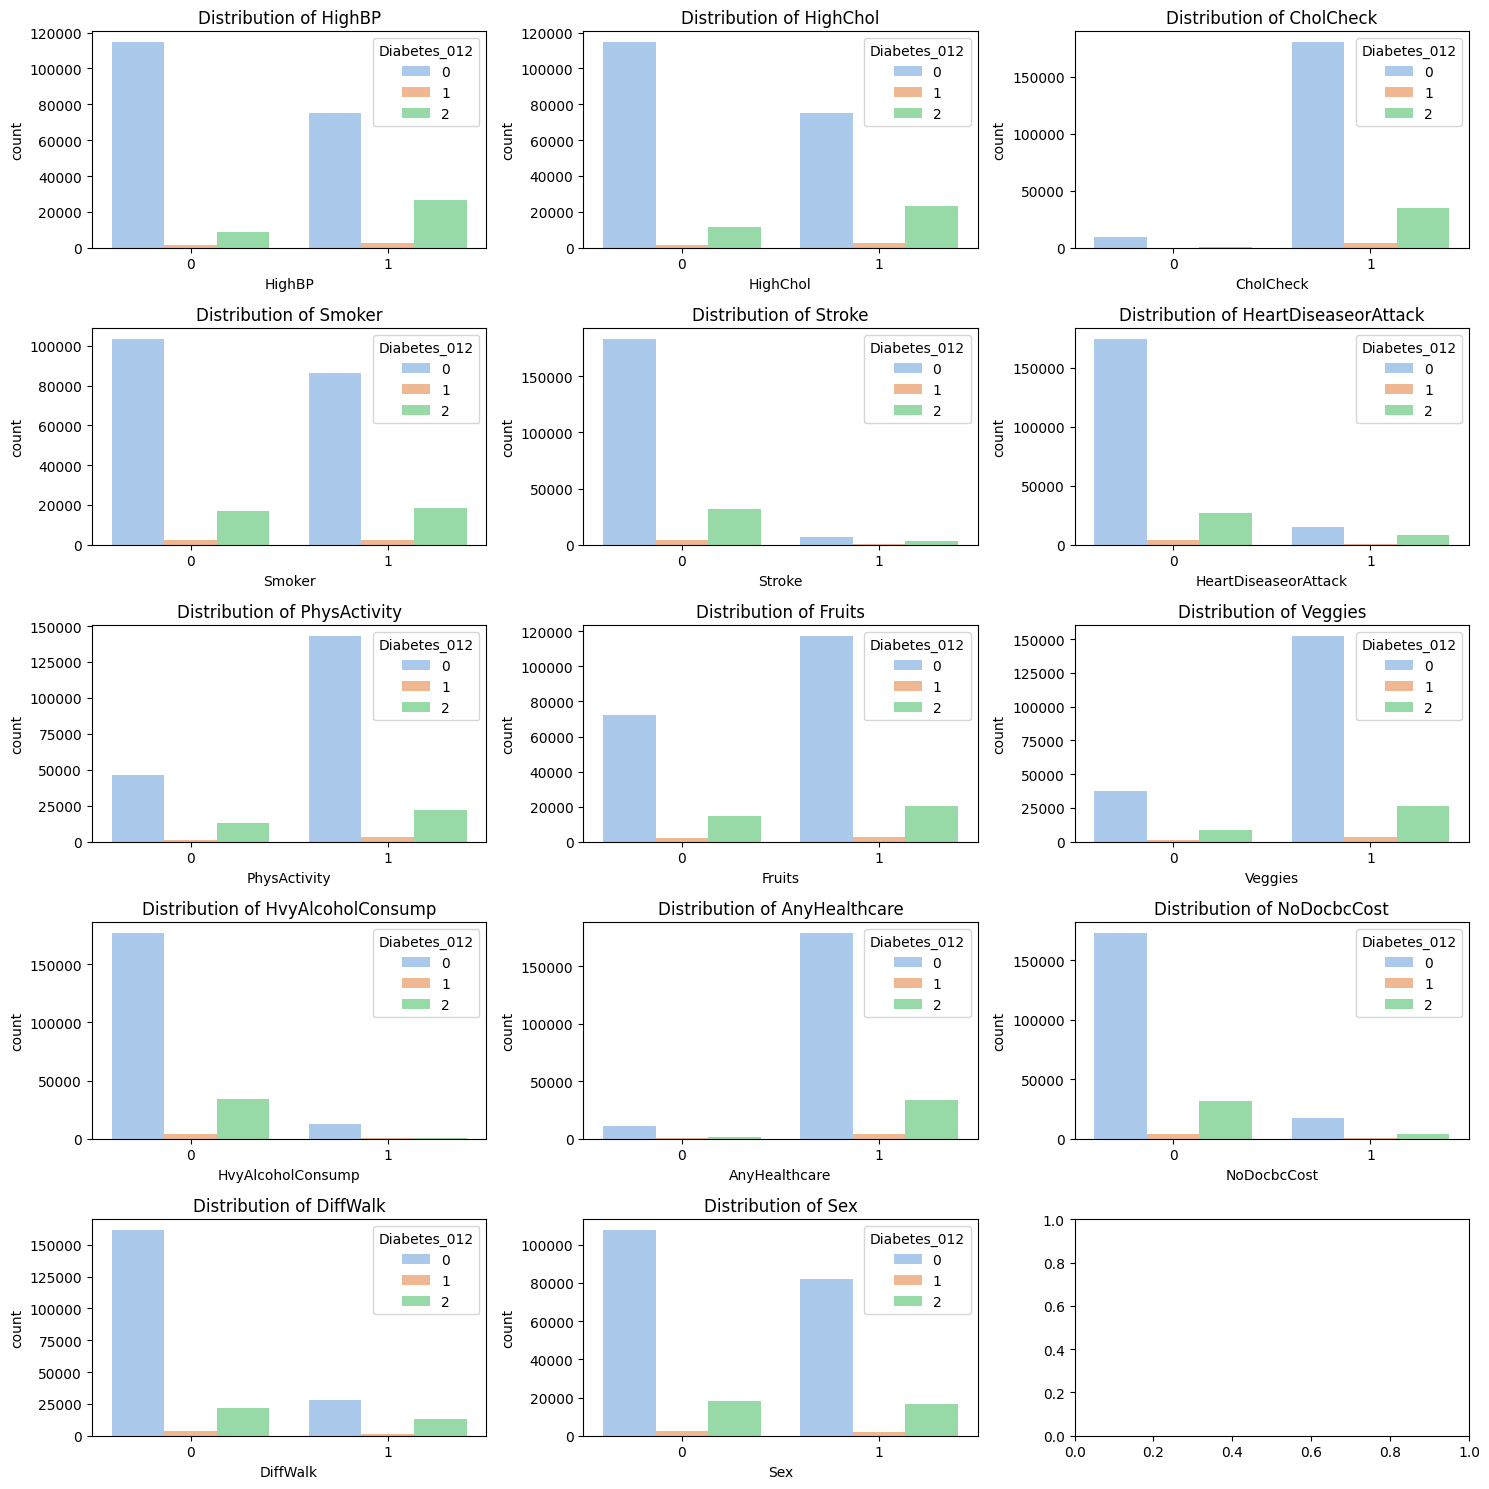

In [ ]:
# Set up subplots for plotting
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5)

# Loop through binary features and create plots
for i, feature in enumerate(features_binary):
    row, col = i // 3, i % 3
    sns.countplot(x=feature, hue='Diabetes_012', data=df, ax=axes[row, col], palette='pastel')
    axes[row, col].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

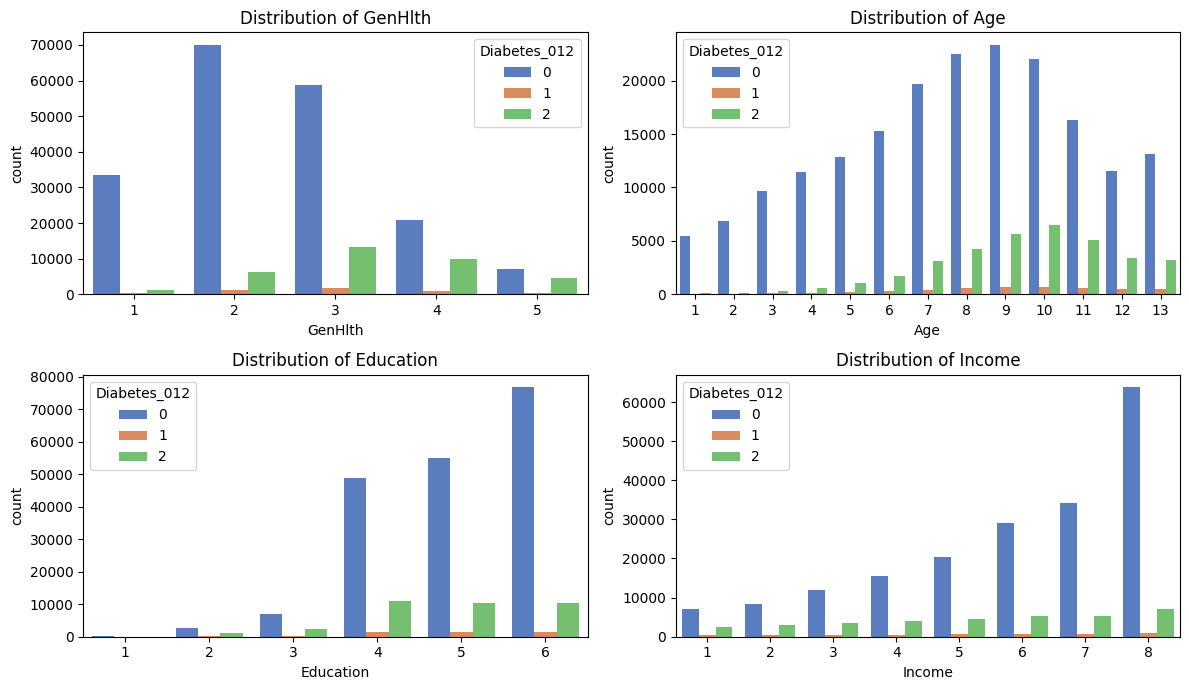

In [ ]:
# Set up subplots for plotting
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,7))
fig.subplots_adjust(hspace=0.5)

# Loop through binary features and create plots
for i, feature in enumerate(features_ordinal):
    row, col = i // 2, i % 2
    sns.countplot(x=feature, hue='Diabetes_012', data=df, ax=axes[row, col], palette='muted')
    axes[row, col].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

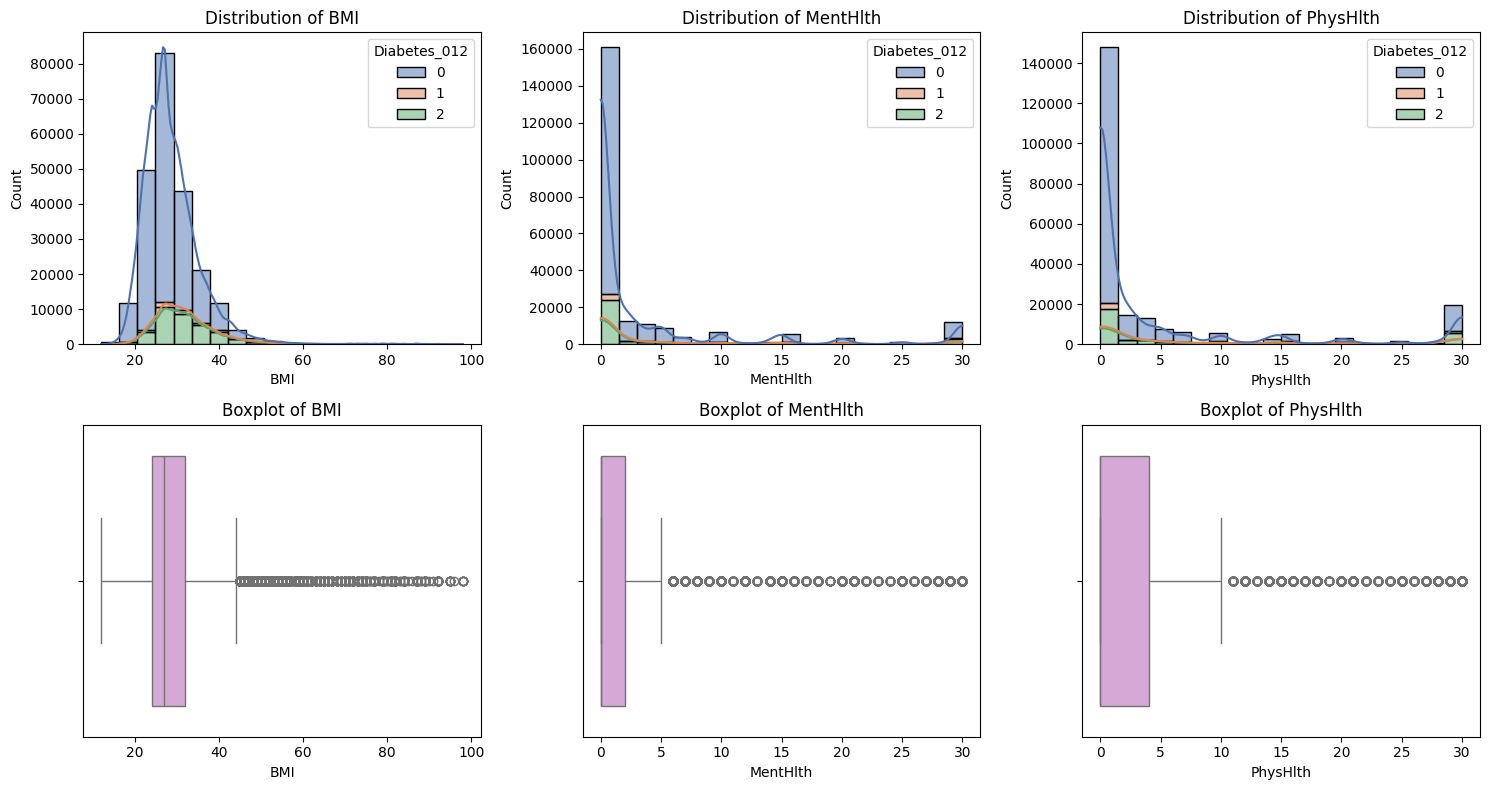

In [ ]:
# Plot histplot and boxplot for each numerical feature
plt.figure(figsize=(15, 8))

for i, feature in enumerate(features_numerical, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df, x=feature, kde=True, bins=20, hue='Diabetes_012', multiple='stack', palette='deep')
    plt.title(f'Distribution of {feature}')

    plt.subplot(2, 3, i + 3)
    sns.boxplot(x=df[feature], color='plum')
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()

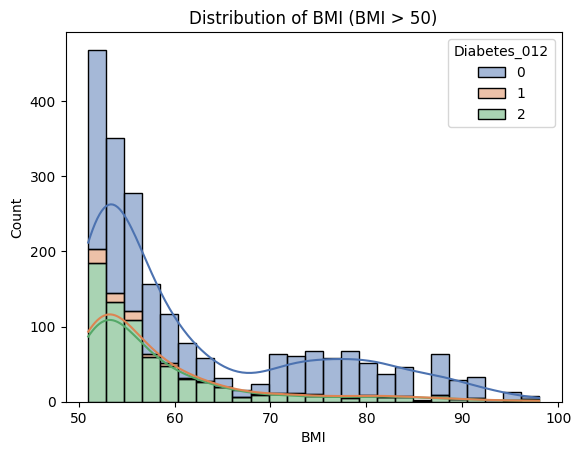

In [ ]:
# Zooming in, plot the histogram for BMI > 50
sns.histplot(df[df['BMI'] > 50], x='BMI', kde=True, bins=25, hue='Diabetes_012', multiple='stack', palette='deep')
plt.title('Distribution of BMI (BMI > 50)')
plt.show()

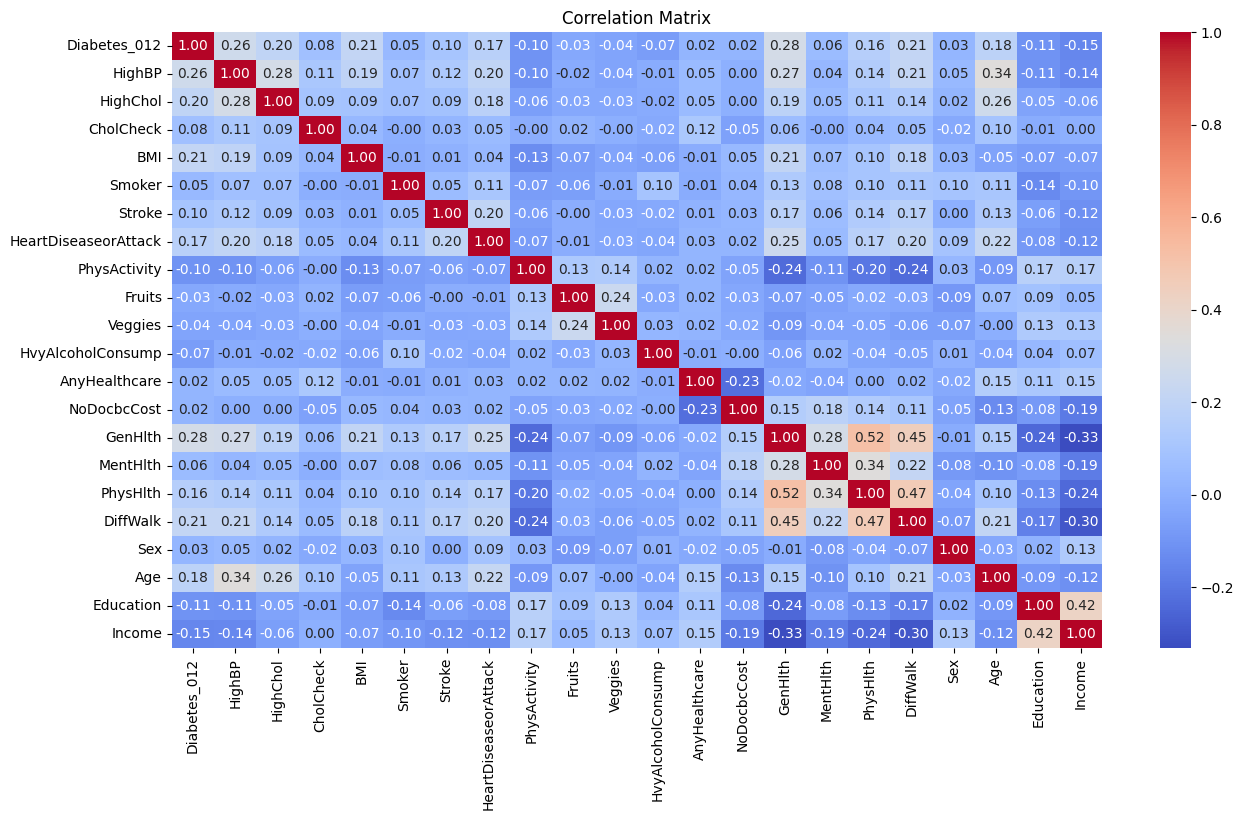

In [ ]:
# Plot the correlation matrix heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Separate target variable & features
X = df.drop(columns = 'Diabetes_012')
y = df['Diabetes_012']

print(X.shape, y.shape)

(229781, 21) (229781,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=88, stratify = y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(183824, 21) (45957, 21) (183824,) (45957,)


In [ ]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

from sklearn.model_selection import cross_validate, cross_val_score, cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import GridSearchCV, HalvingGridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score, roc_auc_score

import warnings
from sklearn.exceptions import ConvergenceWarning

# Ignore ConvergenceWarnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [ ]:
# Define a python function to compute training & testing set metrics
# The weighted average is taken in order to account for class imbalance
def measure_error(y_true, y_pred, label):
    return pd.Series({
        'balanced_accuracy': balanced_accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred, average='weighted'),
        'recall': recall_score(y_true, y_pred, average='weighted'),
        'f1': f1_score(y_true, y_pred, average='weighted'),
        'auc_roc': roc_auc_score(y_true, y_pred, average='weighted')
    }, name=label)


# Function to evaluate the model - fits the model, then computes training vs testing set metrics
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Computes the metrics for the training & testing set, and presents them in a dataframe
    train_test_error = pd.concat([measure_error(y_train, y_train_pred, 'Train'),
                                    measure_error(y_test, y_test_pred, 'Test')],
                                    axis=1)
    print(train_test_error, "\n")

    # Display classification report for test set
    print("Testing Set Classification Report:\n", classification_report(y_test, y_test_pred))

    # Display confusion matrix for the Test set
    cm = confusion_matrix(y_test, y_test_pred)
    disp = ConfusionMatrixDisplay(cm)

    return disp.plot()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score

# Initialize standard scaler
scaler = StandardScaler()

# Create a logistic regression model without regularization
logr = LogisticRegression(solver="liblinear")  # Specify the solver

# Create a pipeline with a standard scaler and the logistic regression model
pipe = Pipeline([
    ('scaler', scaler),
    ('logr', logr)
])

# Fit the pipeline to your training data
pipe.fit(X_train, y_train)

# Predict probabilities on the test data
y_test_probs = pipe.predict_proba(X_test)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_test_probs, multi_class='ovr')  # Specify 'ovr'

print(f"ROC AUC score: {roc_auc:.4f}")


ROC AUC score: 0.7635


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score

# Initialize standard scaler
scaler = StandardScaler()

# Create a logistic regression model without regularization but with balanced class weights
logr = LogisticRegression(class_weight='balanced', solver='liblinear')  # Specify the solver

# Create a pipeline with a standard scaler and the logistic regression model
pipe = Pipeline([
    ('scaler', scaler),
    ('logr', logr)
])

# Fit the pipeline to your training data
pipe.fit(X_train, y_train)

# Predict probabilities on the test data
y_test_probs = pipe.predict_proba(X_test)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_test_probs, multi_class='ovr')  # Specify 'ovr'

print(f"ROC AUC score: {roc_auc:.4f}")


ROC AUC score: 0.7639


In [ ]:
# Initialise model
scaler = StandardScaler()
poly = PolynomialFeatures(interaction_only=True)  # will let GridSearch find the best degree

logr = LogisticRegression(
    # solver = ?,          # will let GridSearch find the best solver
    class_weight = 'balanced'
)

### Pipeline ###
pipe = Pipeline([
   #(nickname, step)
    ('poly', poly),  # degree selected by GridSearchCV
    ('scaler', scaler),
    ('logr', logr) # C selected by GridSearchCV
])

### Parameters to search over ###
param_grid = {
    #'step__param' : [list of param values]
    'poly__degree' : [1,2],
    'logr__solver' :['lbfgs', 'sag', 'saga']
}

### Validator ###
# Use 3 k-fold, considering the size of the dataset & computational power
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=88)

## GridSearch ###
grid = GridSearchCV(pipe,       # model to use
                    param_grid, # parameters to search over
                    scoring = ['precision', 'recall', 'f1', 'balanced_accuracy', 'roc_auc'], # metrics to compute
                    refit = 'balanced_accuracy',  # which metric to use to decide the best model
                    cv = cv,
                    n_jobs = -1
                   )

grid.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan]
  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=88, shuffle=True),
             estimator=Pipeline(steps=[('poly',
                                        PolynomialFeatures(interaction_only=True)),
                                       ('scaler', StandardScaler()),
                                       ('logr',
                                        LogisticRegression(class_weight='balanced'))]),
             n_jobs=-1,
             param_grid={'logr__solver': ['lbfgs', 'sag', 'saga'],
                         'poly__degree': [1, 2]},
             refit='balanced_accuracy',
             scoring=['precision', 'recall', 'f1', 'balanced_accuracy',
                      'roc_auc'])

In [ ]:
print(grid.best_params_)
print(grid.best_score_)

{'logr__solver': 'lbfgs', 'poly__degree': 2}
0.5097576408953085


In [ ]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score

# Assuming evaluate_model function looks something like this:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    # The error arises here with how ROC AUC is calculated, so handling needs to be specific
    if len(set(y_train)) > 2:  # Check if it's a multiclass problem
        roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')
    else:
        roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    print(f'ROC AUC Score: {roc_auc}')

# Initialize standard scaler
scaler = StandardScaler()

# Apply degree=2 to polynomial features with interaction_only=True
poly = PolynomialFeatures(degree=2, interaction_only=True)

# Create a logistic regression model without regularization but with balanced class weights
logr = LogisticRegression(solver='lbfgs', class_weight='balanced', penalty='none', multi_class='ovr')

# Create a pipeline with polynomial features, a standard scaler, and the logistic regression model
pipe = Pipeline([
    ('poly', poly),
    ('scaler', scaler),
    ('logr', logr)
])

# Example data - replace X_train, y_train, X_test, y_test with your actual data
# evaluate_model(pipe, X_train, y_train, X_test, y_test)


In [ ]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Generate example data
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=88)

# Initialize standard scaler
scaler = StandardScaler()

# Apply degree=2 to polynomial features with interaction_only=True
poly = PolynomialFeatures(degree=2, interaction_only=True)

# Create a logistic regression model without regularization but with balanced class weights
logr = LogisticRegression(solver='lbfgs', class_weight='balanced', penalty='none', multi_class='ovr', random_state=88)

# Create a pipeline with polynomial features, a standard scaler, and the logistic regression model
pipe = Pipeline([
    ('poly', poly),
    ('scaler', scaler),
    ('logr', logr)
])

# Fit the pipeline and make predictions
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

# Calculate and print accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


Accuracy: 0.9000
Precision: 0.8725
Recall: 0.9271
F1 Score: 0.8990


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


In [ ]:
print(random_search.best_estimator_.named_steps['svc'].get_params())  # Retrieve best parameters for the 'svc' step
print(random_search.best_score_)

{'C': 0.001, 'class_weight': 'balanced', 'dual': True, 'fit_intercept': True, 'intercept_scaling': 1, 'loss': 'squared_hinge', 'max_iter': 1000, 'multi_class': 'ovr', 'penalty': 'l2', 'random_state': None, 'tol': 0.0001, 'verbose': 0}
0.9488110537092727


In [ ]:
from sklearn.metrics import accuracy_score

# ... (previous code for model training)

# Fit the model
pipe.fit(X_train, y_train)

# Predict on the test set
y_pred = pipe.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9


In [ ]:
from sklearn.svm import LinearSVC
from sklearn.kernel_approximation import RBFSampler
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification

# Generate synthetic data for the example
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=88)

# Assuming X_train, X_test, y_train, and y_test are already defined

# Initialise model
scaler = StandardScaler()
rbf = RBFSampler()  # will let GridSearch find the best gamma
svc = LinearSVC(class_weight='balanced', dual=True)

# Pipeline
pipe = Pipeline([
    # (nickname, step)
    ('rbf', rbf),  # gamma selected by RandomizedSearchCV
    ('scaler', scaler),
    ('svc', svc)  # C selected by RandomizedSearchCV
])

# Parameters to search over
param_dist = {
    'rbf__gamma': [0.01, 0.1, 1, 10, 100],
    'svc__C': [0.01, 0.1, 1]
}

# Validator
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=88)

# RandomizedSearch



In [ ]:
pip install plotly


In [ ]:
import plotly.express as px
import pandas as pd

# Extract results from the randomized search
results = pd.DataFrame(random_search.cv_results_)

# Select only numeric columns for dimensions
numeric_dimensions = results.select_dtypes(include=['float64', 'int64']).columns

# Create a scatter plot for each pair of parameters
fig = px.scatter_matrix(
    results,
    dimensions=numeric_dimensions,
    color='mean_test_balanced_accuracy',
    labels={'param_rbf__gamma': 'Gamma', 'param_svc__C': 'C'},
    title='RandomizedSearchCV Results',
    range_color=[results['mean_test_balanced_accuracy'].min(), results['mean_test_balanced_accuracy'].max()]
)

# Show the figure
fig.show()


In [ ]:
from sklearn.svm import LinearSVC
from sklearn.kernel_approximation import RBFSampler
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification

# Generate synthetic data for the example
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=88)

# Assuming X_train, X_test, y_train, and y_test are already defined

# Initialise model
scaler = StandardScaler()
rbf = RBFSampler()  # will let RandomizedSearchCV find the best gamma
svc = LinearSVC(class_weight='balanced', dual=True)

# Pipeline
pipe = Pipeline([
    # (nickname, step)
    ('rbf', rbf),  # gamma selected by RandomizedSearchCV
    ('scaler', scaler),
    ('svc', svc)  # C selected by RandomizedSearchCV
])

# Parameters to search over
param_dist = {
    'rbf__gamma': [0.01, 0.1, 1, 10, 100],
    'svc__C': [0.01, 0.1, 1]
}

# Validator
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=88)

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    pipe,
    param_distributions=param_dist,
    n_iter=10,
    scoring=['precision', 'recall', 'f1', 'balanced_accuracy', 'roc_auc'],
    refit='balanced_accuracy',
    cv=cv,
    random_state=88,
    n_jobs=-1
)

# Fit the randomized search using the training data
random_search.fit(X_train, y_train)

# Retrieve best parameters for the 'svc' step
print(random_search.best_params_)

# Retrieve best score
print(random_search.best_score_)


{'svc__C': 1, 'rbf__gamma': 0.01}
0.8825521971196272


In [ ]:
from sklearn.svm import LinearSVC
from sklearn.kernel_approximation import RBFSampler
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Generate synthetic data for the example
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=88)

# Initialise model
scaler = StandardScaler()
rbf = RBFSampler()  # will let RandomizedSearchCV find the best gamma
svc = LinearSVC(class_weight='balanced', dual=True)

# Pipeline
pipe = Pipeline([
    # (nickname, step)
    ('rbf', rbf),  # gamma selected by RandomizedSearchCV
    ('scaler', scaler),
    ('svc', svc)  # C selected by RandomizedSearchCV
])

# Parameters to search over
param_dist = {
    'rbf__gamma': [0.01, 0.1, 1, 10, 100],
    'svc__C': [0.01, 0.1, 1]
}

# Validator
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=88)

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    pipe,
    param_distributions=param_dist,
    n_iter=10,
    scoring=['precision', 'recall', 'f1', 'balanced_accuracy', 'roc_auc'],
    refit='balanced_accuracy',
    cv=cv,
    random_state=88,
    n_jobs=-1
)

# Fit the randomized search using the training data
random_search.fit(X_train, y_train)

# Retrieve best parameters for the 'svc' step
print(random_search.best_params_)

# Retrieve best score
print(random_search.best_score_)

# Predict using the best estimator
y_pred = random_search.best_estimator_.predict(X_test)

# Calculate and print additional metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


{'svc__C': 1, 'rbf__gamma': 0.01}
0.8624720487315907
Accuracy: 0.9000
F1 Score: 0.8958
Precision: 0.8958
Recall: 0.8958


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# ... (previous code)

# Fit the model
pipe.fit(X_train, y_train)

# Predict on the test set
y_pred = pipe.predict(X_test)

# Evaluate the model using standard metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.46
Precision: 0.44
Recall: 0.4583333333333333
F1 Score: 0.4489795918367347
Confusion Matrix:
 [[48 56]
 [52 44]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# ... (previous code)

# Create a Random Forest model with balanced class weights
rfc = RandomForestClassifier(
    n_estimators=100,  # default
    max_features='sqrt',
    # max_depth= ?, # to optimise
    # max_leaf_nodes = ?,  # to optimise
    # min_samples_split = ? # to optimise
    class_weight='balanced',  # ensure balanced weights to account for class imbalance (balanced, balanced_subsample - very similar results)
    random_state=88
)

# Parameters to search over
param_grid = {
    'max_depth': [15, 20, 25, 30],
    'max_leaf_nodes': [50, 75, 100, 150],
    'min_samples_split': [50, 100, 200, 400]
}

# Validator
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=88)

# GridSearch
grid = GridSearchCV(
    rfc,  # model to use
    param_grid,  # parameters to search over
    scoring=['precision', 'recall', 'f1', 'balanced_accuracy', 'roc_auc'],  # metrics to compute
    refit='balanced_accuracy',  # which metric to use to decide the best model
    cv=cv,
    n_jobs=-1
)

grid.fit(X_train, y_train)



GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=88, shuffle=True),
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=88),
             n_jobs=-1,
             param_grid={'max_depth': [15, 20, 25, 30],
                         'max_leaf_nodes': [50, 75, 100, 150],
                         'min_samples_split': [50, 100, 200, 400]},
             refit='balanced_accuracy',
             scoring=['precision', 'recall', 'f1', 'balanced_accuracy',
                      'roc_auc'])

In [ ]:
print(grid.best_params_)
print(grid.best_score_)

{'max_depth': 15, 'max_leaf_nodes': 50, 'min_samples_split': 50}
0.8999123979403878


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Fit the RandomForestClassifier model
rfc.fit(X_train, y_train)

# Predictions on the test set
y_pred = rfc.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.9100
Precision: 0.8980
Recall: 0.9167
F1 Score: 0.9072


In [ ]:
from xgboost import XGBClassifier

# Calculate the ratio of the number of negative class samples to positive class samples
balanced_weights = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

param_grid = {
    'max_depth': [1, 3, 5, 7],  # default is 6   # train on small trees / decision stumps  # the higher the depth, the more likely to overfit
    'learning_rate' : [0.1, 0.2, 0.3, 0.4],  # default is 0.3   # learning_rate
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1]    # default is 1    # Subsample ratio of the training instances, lower value prevents overfitting
}

# Create an XGBoost model with scale_pos_weight
xgb = XGBClassifier(booster='gbtree', scale_pos_weight=balanced_weights, random_state=88)

### Validator ###
# Use 3 k-fold, considering the size of the dataset & computational power
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=88)

## GridSearch ###
grid = GridSearchCV(xgb,       # model to use
                    param_grid, # parameters to search over
                    scoring = ['precision', 'recall', 'f1', 'balanced_accuracy', 'roc_auc'], # metrics to compute
                    refit = 'balanced_accuracy',  # which metric to use to decide the best model
                    cv = cv,
                    n_jobs = -1
                   )

grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=88, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster='gbtree',
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=88, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.3, 0.4],
                         'max_depth': [1, 3, 5, 7],
                         'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1]},
             refit='balanced_accuracy',
             scoring=['precision', 'recall', 'f1', 'balanced_accuracy',
                      'roc_auc'])

In [ ]:
print(grid.best_params_)
print(grid.best_score_)

{'learning_rate': 0.3, 'max_depth': 5, 'subsample': 0.9}
0.9274481455779165


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Fit the XGBoost model
xgb.fit(X_train, y_train)

# Predictions on the test set
y_pred = xgb.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.9300
Precision: 0.9100
Recall: 0.9479
F1 Score: 0.9286


In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Define individual classifiers
clf1 = DecisionTreeClassifier(random_state=42)
clf2 = GaussianNB()

# Define the Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('dtree', clf1),
    ('nb', clf2)
], voting='soft')

# Fit and evaluate the Voting Classifier
voting_clf.fit(X_train, y_train)
predictions = voting_clf.predict(X_test)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.datasets import make_classification

# Generate synthetic data for the example
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=88)

# Create a Random Forest model with balanced class weights
rfc = RandomForestClassifier(class_weight='balanced', random_state=88)

# Parameters to search over
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [15, 20, 25, 30],
    'max_leaf_nodes': [50, 75, 100, 150],
    'min_samples_split': [50, 100, 200, 400]
}

# Validator
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=88)

# GridSearchCV
grid = GridSearchCV(
    rfc,
    param_grid,
    scoring=['precision', 'recall', 'f1', 'balanced_accuracy', 'roc_auc'],
    refit='balanced_accuracy',
    cv=cv,
    n_jobs=-1
)

# Fit the grid search using the training data
grid.fit(X_train, y_train)

# Print best parameters and best score
print("Best Parameters:", grid.best_params_)
print("Best Balanced Accuracy:", grid.best_score_)



Best Parameters: {'max_depth': 15, 'max_leaf_nodes': 50, 'min_samples_split': 50, 'n_estimators': 300}
Best Balanced Accuracy: 0.911211135956683


In [ ]:
# RandomizedSearchCV
random_search = RandomizedSearchCV(
    xgb,
    param_distributions=param_dist,
    n_iter=10,  # adjust as needed
    scoring=['precision', 'recall', 'f1', 'balanced_accuracy', 'roc_auc'],
    refit='balanced_accuracy',
    cv=cv,
    random_state=88,
    n_jobs=-1
)

# Fit the randomized search using the training data
random_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)



Best Parameters: {'svc__C': 0.01, 'rbf__gamma': 0.1}
Best Score: 0.9200126798091174


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[01:03:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "rbf__gamma", "svc__C" } are not used.




In [ ]:
def evaluate_model(models):
    """
    Takes a list of models and returns chart of cross validation scores using mean accuracy
    """

    # Cross validate model with Kfold stratified cross val
    kfold = StratifiedKFold(n_splits = 10)

    result = []
    for model in models :
        result.append(cross_val_score(estimator = model, X = x_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

    cv_means = []
    cv_std = []
    for cv_result in result:
        cv_means.append(cv_result.mean())
        cv_std.append(cv_result.std())

    result_df = pd.DataFrame({
        "CrossValMeans":cv_means,
        "CrossValerrors": cv_std,
        "Models":[
            "LogisticRegression",

            "XGBClassifier",
            "Linear SVC",
            "RandomForestClassifier",

        ]
    })

    # Generate chart
    bar = sns.barplot(x = "CrossValMeans", y = "Models", data = result_df, orient = "h")
    bar.set_xlabel("Mean Accuracy")
    bar.set_title("Cross validation scores")
    return result_df

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import KFold  # Import KFold
from sklearn.model_selection import cross_val_score

# Create a KFold object with the desired number of splits (e.g., 5)
kfold = KFold(n_splits=5, shuffle=True, random_state=20)  # Adjust as needed

# Split your data into training and testing sets (replace with your actual data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=20)
# Your existing models list
models = [
    LogisticRegression(random_state=20, solver='liblinear'),
    XGBClassifier(random_state=20, learning_rate=0.5),
    LinearSVC(random_state=20),
    RandomForestClassifier(random_state=20)
]

# Evaluate the models
for model in models:
    scores = cross_val_score(estimator=model, X=X_train, y=y_train, scoring="accuracy", cv=kfold, n_jobs=4)
    print(f"Model: {model.__class__.__name__}, Mean Accuracy: {scores.mean():.4f}")





Model: LogisticRegression, Mean Accuracy: 0.8433
Model: XGBClassifier, Mean Accuracy: 0.9083
Model: LinearSVC, Mean Accuracy: 0.8450
Model: RandomForestClassifier, Mean Accuracy: 0.9083


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold  # Import KFold

# Create a KFold object with the desired number of splits (e.g., 5)
kfold = KFold(n_splits=5, shuffle=True, random_state=20)

# Split your data into training and testing sets (replace with your actual data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=20)

# Your existing models list
models = [
    LogisticRegression(random_state=20, solver='liblinear'),
    XGBClassifier(random_state=20, learning_rate=0.5),
    LinearSVC(random_state=20),
    RandomForestClassifier(random_state=20)
]

# Evaluate the models
for model in models:
    scores_accuracy = cross_val_score(estimator=model, X=X_train, y=y_train, scoring="accuracy", cv=kfold, n_jobs=4)
    scores_precision = cross_val_score(estimator=model, X=X_train, y=y_train, scoring="precision", cv=kfold, n_jobs=4)
    scores_recall = cross_val_score(estimator=model, X=X_train, y=y_train, scoring="recall", cv=kfold, n_jobs=4)
    scores_f1 = cross_val_score(estimator=model, X=X_train, y=y_train, scoring="f1", cv=kfold, n_jobs=4)

    print(f"Model: {model.__class__.__name__}")
    print(f"Mean Accuracy: {scores_accuracy.mean():.4f}")
    print(f"Mean Precision: {scores_precision.mean():.4f}")
    print(f"Mean Recall: {scores_recall.mean():.4f}")
    print(f"Mean F1 Score: {scores_f1.mean():.4f}")
    print()


Model: LogisticRegression
Mean Accuracy: 0.8433
Mean Precision: 0.8450
Mean Recall: 0.8489
Mean F1 Score: 0.8460

Model: XGBClassifier
Mean Accuracy: 0.9083
Mean Precision: 0.8958
Mean Recall: 0.9270
Mean F1 Score: 0.9103

Model: LinearSVC
Mean Accuracy: 0.8450
Mean Precision: 0.8479
Mean Recall: 0.8493
Mean F1 Score: 0.8476

Model: RandomForestClassifier
Mean Accuracy: 0.9083
Mean Precision: 0.9048
Mean Recall: 0.9195
Mean F1 Score: 0.9113



In [ ]:
#df = data.copy()
print(df.shape)
df.head()

(229781, 22)


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40.0,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25.0,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28.0,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27.0,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24.0,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


In [ ]:
# Separate target variable & features
X = df.drop(columns = 'Diabetes_012')
y = df['Diabetes_012']

print(X.shape, y.shape)

(229781, 21) (229781,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=88, stratify = y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(183824, 21) (45957, 21) (183824,) (45957,)


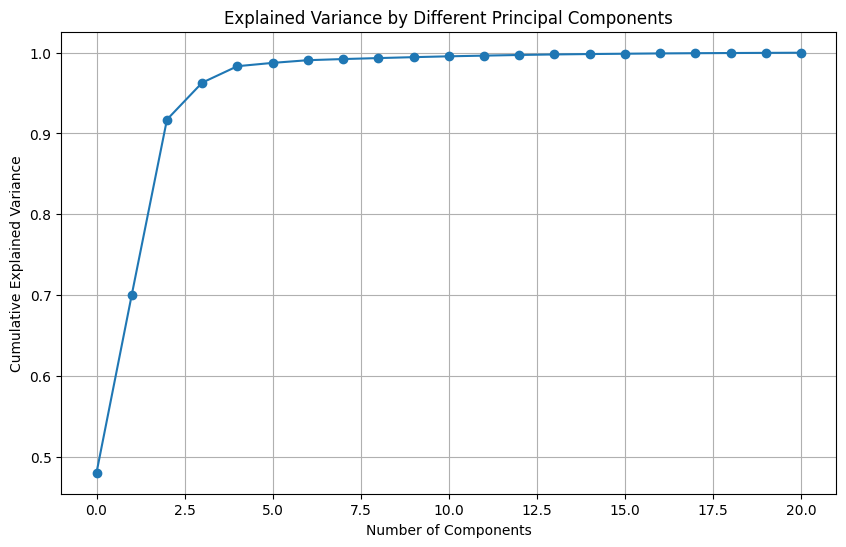

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming X_train is already defined and is a DataFrame
pca = PCA(n_components=21)
pca_data = pca.fit_transform(X_train)

# Calculate the percentage of variance each principal component contributes
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_)

# Calculate the cumulative variance explained
cum_var_explained = np.cumsum(percentage_var_explained)

# Plotting the Cumulative Summation of the Explained Variance
plt.figure(figsize=(10, 6))
plt.plot(cum_var_explained, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Different Principal Components')
plt.grid(True)  # Ensure this call is correct; enables the grid
plt.show()


In [ ]:
pip install prettytable


In [ ]:

from prettytable import PrettyTable

# Assuming PCA has been performed and pca.explained_variance_ratio_ is available
n_components_lt = []
cum_var_exp_lt = []
for i in range(1, 11):
    n_components_lt.append(i)
    cum_var_exp_lt.append(round(sum(pca.explained_variance_ratio_[:i] * 100), 2))

columns = ["n_components", "cum_var_exp %"]

# Create a PrettyTable object
myTable = PrettyTable()

# Add Columns
myTable.add_column(columns[0], n_components_lt)
myTable.add_column(columns[1], cum_var_exp_lt)

# Print the table
print(myTable)


+--------------+---------------+
| n_components | cum_var_exp % |
+--------------+---------------+
|      1       |      48.0     |
|      2       |     70.01     |
|      3       |     91.72     |
|      4       |     96.29     |
|      5       |     98.33     |
|      6       |     98.74     |
|      7       |     99.07     |
|      8       |     99.22     |
|      9       |     99.34     |
|      10      |     99.45     |
+--------------+---------------+


In [ ]:

get_n_components = 10
x_pca_train = pca_data[:,:get_n_components]
x_pca_train.shape

(183824, 10)

In [ ]:
pca_test = pca.transform(X_test)
x_pca_test = pca_test[:,:get_n_components]
x_pca_test.shape

(45957, 10)

In [ ]:
# ref code: https://github.com/CodinjaoftheWorld/t-SNE-on-MNIST-and-Visualization/blob/master/t-SNE%20MNIST.ipynb

import time

from sklearn.manifold import TSNE

#n_sne = 7000

time_start = time.time()
tsne = TSNE(n_iter=300,n_components=2,perplexity=30,random_state=10) #https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
tsne_results = tsne.fit_transform(X_train.values)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 1598.8713176250458 seconds


<ipython-input-60-1d65aa4c17af>:11: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



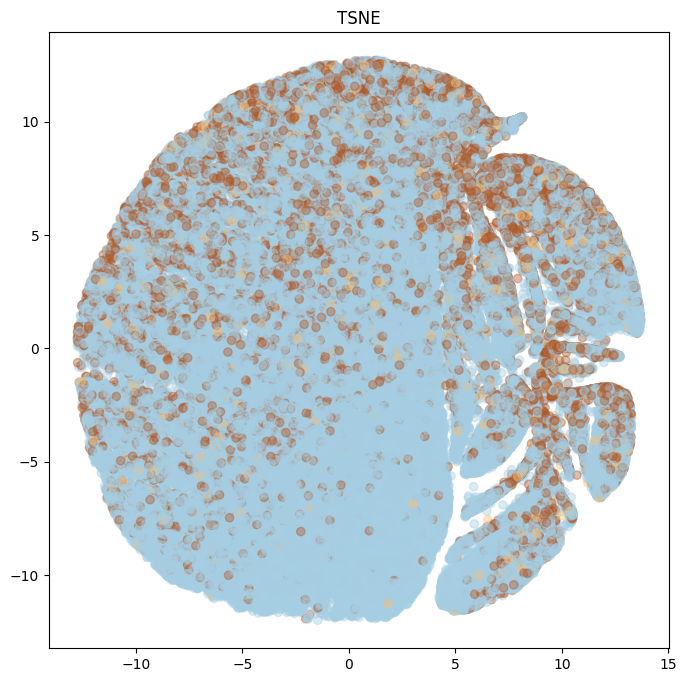

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# Create the figure
fig = plt.figure( figsize=(8,8) )
ax = fig.add_subplot(1, 1, 1, title='TSNE' )
# Create the scatter
ax.scatter(
    x=tsne_results[:,0],
    y=tsne_results[:,1],
    c=y_train,
    cmap=plt.cm.get_cmap('Paired'),
    alpha=0.4)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=88, stratify = y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(183824, 21) (45957, 21) (183824,) (45957,)


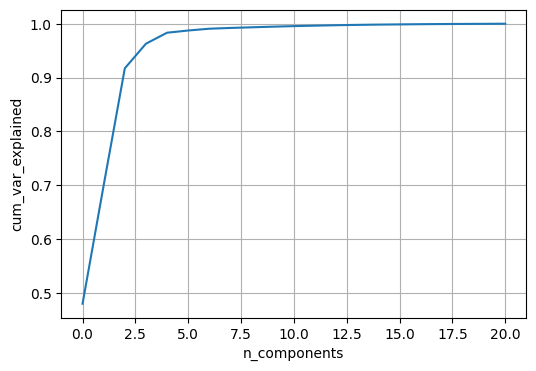

In [ ]:


pca = PCA(n_components=21)
pca_data = pca.fit_transform(X_train.values)
percentage_var_explained = pca.explained_variance_/np.sum(pca.explained_variance_)
cum_var_explained = np.cumsum(percentage_var_explained)

plt.figure(figsize=(6, 4))
plt.clf()
plt.plot(cum_var_explained)
plt.grid()
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('cum_var_explained')
plt.show()

In [ ]:
n_components_lt = []
cum_var_exp_lt = []
for i in range(1,11):
  n_components_lt.append(i)
  cum_var_exp_lt.append(round(sum(pca.explained_variance_ratio_[:i]*100),2))


columns = ["n_components", "cum_var_exp %"]

myTable = PrettyTable()
# Add Columns
myTable.add_column(columns[0], n_components_lt)
myTable.add_column(columns[1], cum_var_exp_lt)
print(myTable)

+--------------+---------------+
| n_components | cum_var_exp % |
+--------------+---------------+
|      1       |      48.0     |
|      2       |     70.01     |
|      3       |     91.72     |
|      4       |     96.29     |
|      5       |     98.33     |
|      6       |     98.74     |
|      7       |     99.07     |
|      8       |     99.22     |
|      9       |     99.34     |
|      10      |     99.45     |
+--------------+---------------+


In [ ]:
get_n_components = 10
X_train = pca_data[:,:get_n_components]
X_train.shape

(183824, 10)

In [ ]:
pca_test = pca.transform(X_test)
X_test = pca_test[:,:get_n_components]
X_test.shape

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but PCA was fitted without feature names



(45957, 10)

In [ ]:
get_n_components = 10
X_train = pca_data[:,:get_n_components]
X_train.shape

In [ ]:
get_n_components = 10
y_train = pca_data[:,:get_n_components]
y_train.shape

(183824, 10)

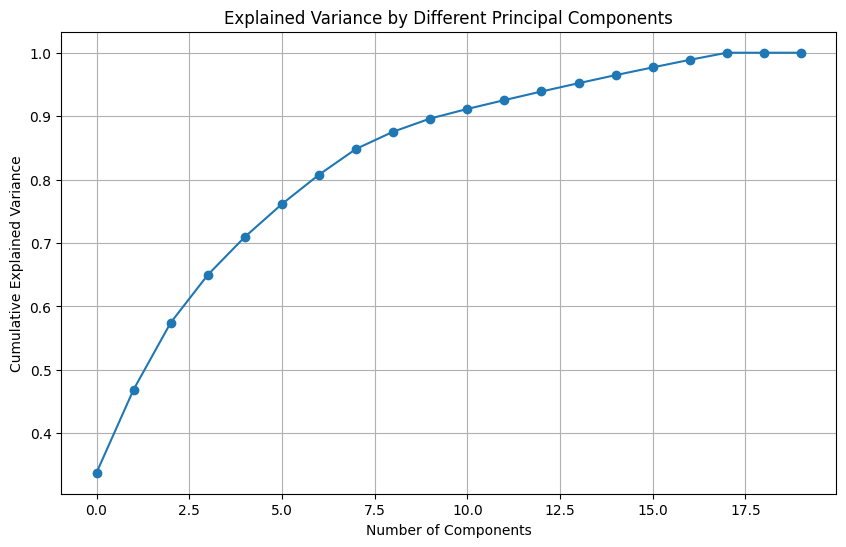

Best Parameters: {'max_depth': 15, 'max_leaf_nodes': 50, 'min_samples_split': 50, 'n_estimators': 300}
Best Balanced Accuracy: 0.8622379434720401


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.datasets import make_classification

# Generate synthetic data for the example
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=88)

# Perform PCA
pca = PCA(n_components=20)  # Adjusted to the maximum permissible number of components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Calculate the percentage of variance each principal component contributes
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_)
# Calculate the cumulative variance explained
cum_var_explained = np.cumsum(percentage_var_explained)

# Plotting the Cumulative Summation of the Explained Variance
plt.figure(figsize=(10, 6))
plt.plot(cum_var_explained, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Different Principal Components')
plt.grid(True)
plt.show()

# Create a Random Forest model with balanced class weights
rfc = RandomForestClassifier(class_weight='balanced', random_state=88)

# Parameters to search over
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [15, 20, 25, 30],
    'max_leaf_nodes': [50, 75, 100, 150],
    'min_samples_split': [50, 100, 200, 400]
}

# Validator
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=88)

# GridSearchCV
grid = GridSearchCV(
    rfc,
    param_grid,
    scoring=['precision', 'recall', 'f1', 'balanced_accuracy', 'roc_auc'],
    refit='balanced_accuracy',
    cv=cv,
    n_jobs=-1
)

# Fit the grid search using the PCA-transformed training data
grid.fit(X_train_pca, y_train)

# Print best parameters and best score
print("Best Parameters:", grid.best_params_)
print("Best Balanced Accuracy:", grid.best_score_)


In [ ]:
n_components_lt = []
cum_var_exp_lt = []
for i in range(1,11):
  n_components_lt.append(i)
  cum_var_exp_lt.append(round(sum(pca.explained_variance_ratio_[:i]*100),2))


columns = ["n_components", "cum_var_exp %"]

myTable = PrettyTable()
# Add Columns
myTable.add_column(columns[0], n_components_lt)
myTable.add_column(columns[1], cum_var_exp_lt)
print(myTable)

In [ ]:
import time
from sklearn.manifold import TSNE

time_start = time.time()
tsne = TSNE(n_iter=300, n_components=2, perplexity=30, random_state=10)
tsne_results = tsne.fit_transform(X_train)  # Assuming X_train is already a numpy array

print('t-SNE done! Time elapsed: {} seconds'.format(time.time() - time_start))


t-SNE done! Time elapsed: 3.5057828426361084 seconds


In [ ]:
import time
from sklearn.manifold import TSNE

time_start = time.time()
tsne = TSNE(n_iter=300, n_components=2, perplexity=30, random_state=10)

# Check if X_train is a DataFrame and convert if necessary
if isinstance(X_train, pd.DataFrame):
    tsne_results = tsne.fit_transform(X_train.values)
else:
    tsne_results = tsne.fit_transform(X_train)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time() - time_start))


t-SNE done! Time elapsed: 4.050067186355591 seconds


<ipython-input-78-1d65aa4c17af>:11: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



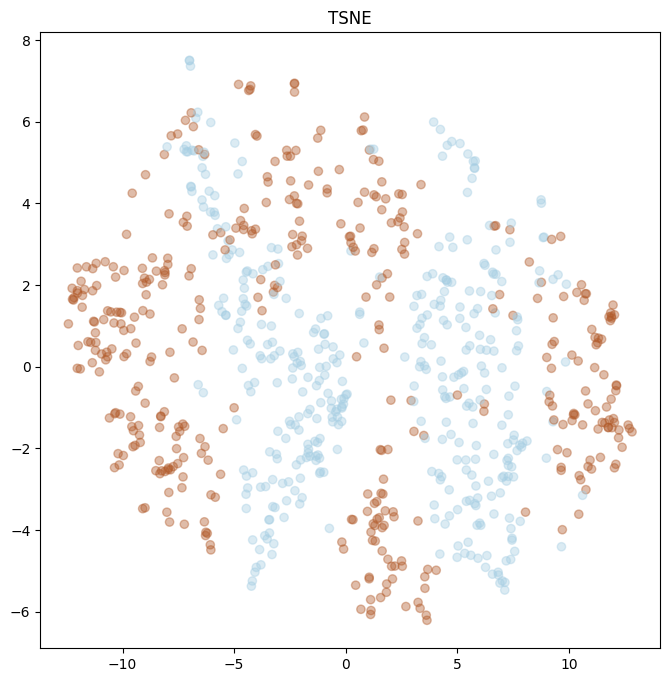

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# Create the figure
fig = plt.figure( figsize=(8,8) )
ax = fig.add_subplot(1, 1, 1, title='TSNE' )
# Create the scatter
ax.scatter(
    x=tsne_results[:,0],
    y=tsne_results[:,1],
    c=y_train,
    cmap=plt.cm.get_cmap('Paired'),
    alpha=0.4)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# Create the figure
fig = plt.figure( figsize=(8,8) )
ax = fig.add_subplot(1, 1, 1, title='TSNE' )
# Create the scatter
ax.scatter(
    x=tsne_results[:,0],
    y=tsne_results[:,1],
    c=y_train,
    cmap=plt.cm.get_cmap('Paired'),
    alpha=0.4)
plt.show()

Best Parameters: {'learning_rate': 0.3, 'max_depth': 5, 'subsample': 0.9}
Best Balanced Accuracy: 0.9209947224578268


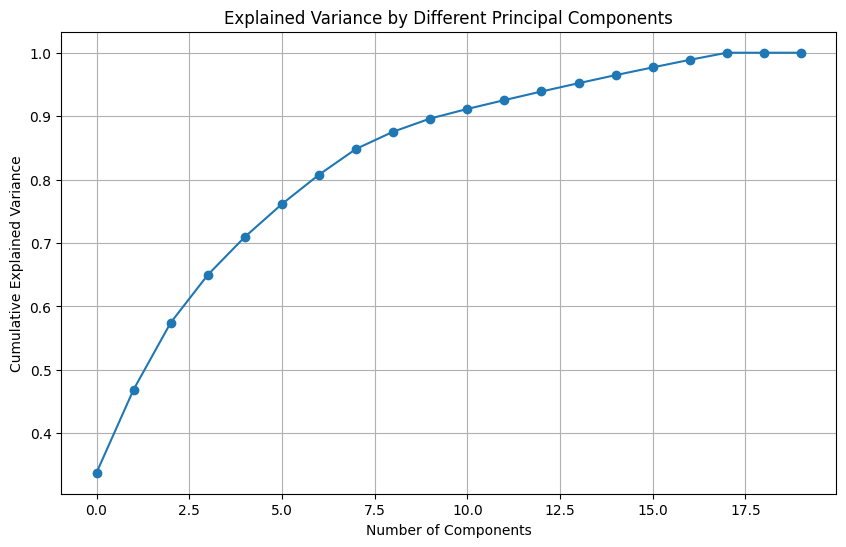

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from xgboost import XGBClassifier

# Assuming X_train and y_train are already defined
# Perform PCA
pca = PCA(n_components=20)  # Adjusted to the maximum permissible number of components
X_train_pca = pca.fit_transform(X_train)

# Create an XGBoost model with scale_pos_weight
balanced_weights = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
xgb = XGBClassifier(booster='gbtree', scale_pos_weight=balanced_weights, random_state=88)

# Parameters to search over
param_grid = {
    'max_depth': [1, 3, 5, 7],
    'learning_rate': [0.1, 0.2, 0.3, 0.4],
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1]
}

# Validator
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=88)

# GridSearchCV
grid = GridSearchCV(
    xgb,
    param_grid,
    scoring=['precision', 'recall', 'f1', 'balanced_accuracy', 'roc_auc'],
    refit='balanced_accuracy',
    cv=cv,
    n_jobs=-1
)

# Fit the grid search using the PCA-transformed training data
grid.fit(X_train_pca, y_train)

# Print best parameters and best score
print("Best Parameters:", grid.best_params_)
print("Best Balanced Accuracy:", grid.best_score_)

# Optionally, plot the explained variance
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_)
cum_var_explained = np.cumsum(percentage_var_explained)

plt.figure(figsize=(10, 6))
plt.plot(cum_var_explained, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Different Principal Components')
plt.grid(True)
plt.show()


In [ ]:
import time
from sklearn.manifold import TSNE

time_start = time.time()
tsne = TSNE(n_iter=300, n_components=2, perplexity=30, random_state=10)
tsne_results = tsne.fit_transform(X_train)  # Assuming X_train is already a numpy array

print('t-SNE done! Time elapsed: {} seconds'.format(time.time() - time_start))


t-SNE done! Time elapsed: 4.383608341217041 seconds


In [ ]:
import time
from sklearn.manifold import TSNE

time_start = time.time()
tsne = TSNE(n_iter=300, n_components=2, perplexity=30, random_state=10)

# Check if X_train is a DataFrame and convert if necessary
if isinstance(X_train, pd.DataFrame):
    tsne_results = tsne.fit_transform(X_train.values)
else:
    tsne_results = tsne.fit_transform(X_train)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time() - time_start))


t-SNE done! Time elapsed: 3.290302038192749 seconds


<ipython-input-83-1d65aa4c17af>:11: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



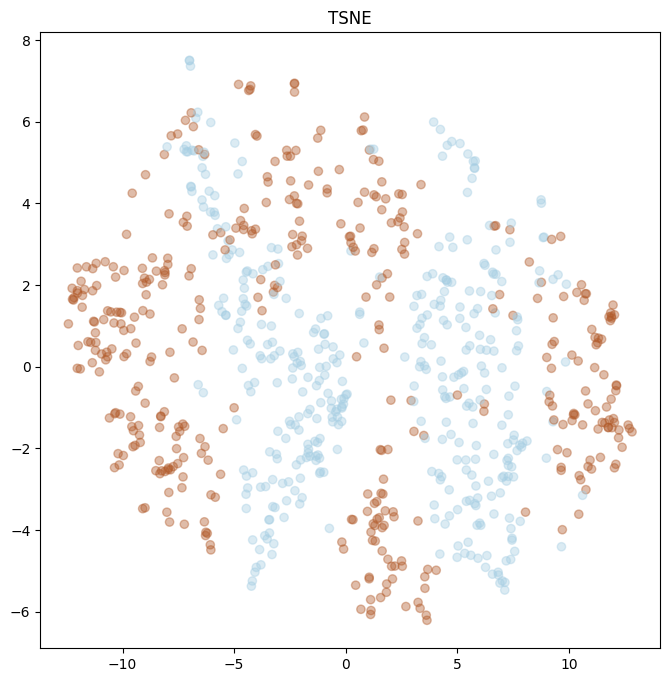

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# Create the figure
fig = plt.figure( figsize=(8,8) )
ax = fig.add_subplot(1, 1, 1, title='TSNE' )
# Create the scatter
ax.scatter(
    x=tsne_results[:,0],
    y=tsne_results[:,1],
    c=y_train,
    cmap=plt.cm.get_cmap('Paired'),
    alpha=0.4)
plt.show()

{'svc__C': 1, 'rbf__gamma': 0.01}
0.8599924178168452


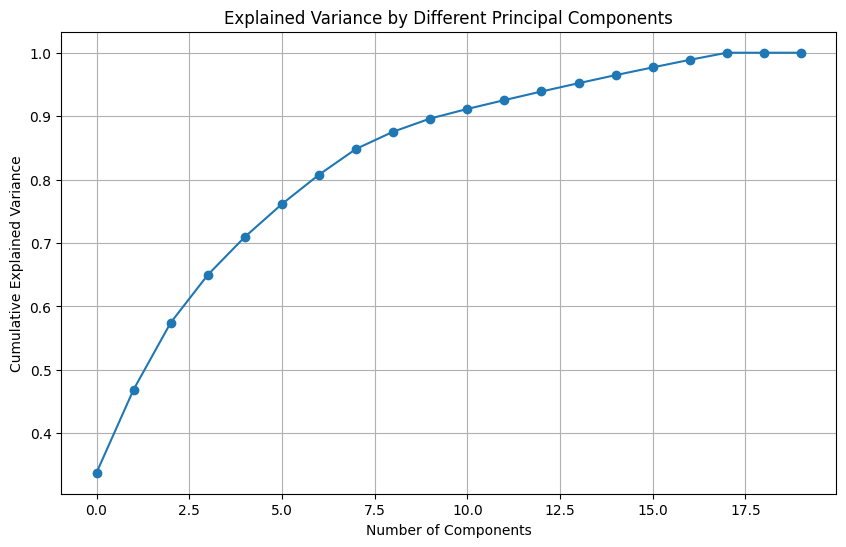

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.kernel_approximation import RBFSampler
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification

# Generate synthetic data for the example
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=88)

# Initialize model components
scaler = StandardScaler()
rbf = RBFSampler()
svc = LinearSVC(class_weight='balanced', dual=True)

# Pipeline with PCA
pipe = Pipeline([
    ('pca', PCA(n_components=20)),  # PCA with 20 components
    ('rbf', rbf),
    ('scaler', scaler),
    ('svc', svc)
])

# Parameters to search over
param_dist = {
    'rbf__gamma': [0.01, 0.1, 1, 10, 100],
    'svc__C': [0.01, 0.1, 1]
}

# Validator
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=88)

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    pipe,
    param_distributions=param_dist,
    n_iter=10,
    scoring=['precision', 'recall', 'f1', 'balanced_accuracy', 'roc_auc'],
    refit='balanced_accuracy',
    cv=cv,
    random_state=88,
    n_jobs=-1
)

# Fit the randomized search using the training data
random_search.fit(X_train, y_train)

# Retrieve best parameters for the 'svc' step
print(random_search.best_params_)

# Retrieve best score
print(random_search.best_score_)

# Plot PCA explained variance
pca_data = random_search.best_estimator_['pca'].transform(X_train)
percentage_var_explained = random_search.best_estimator_['pca'].explained_variance_ratio_
cum_var_explained = np.cumsum(percentage_var_explained)

plt.figure(figsize=(10, 6))
plt.plot(cum_var_explained, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Different Principal Components')
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.svm import LinearSVC
from sklearn.kernel_approximation import RBFSampler
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification
import time

# Generate synthetic data for the example
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=88)

# Perform t-SNE
time_start_tsne = time.time()
tsne = TSNE(n_iter=300, n_components=2, perplexity=30, random_state=10)
X_train_tsne = tsne.fit_transform(X_train)  # Assuming X_train is already a numpy array
print('t-SNE done! Time elapsed: {} seconds'.format(time.time() - time_start_tsne))

# Initialize model components
scaler = StandardScaler()
rbf = RBFSampler()
svc = LinearSVC(class_weight='balanced', dual=True)

# Pipeline with PCA
pipe = Pipeline([
    ('scaler', scaler),
    ('rbf', rbf),
    ('svc', svc)
])

# Parameters to search over
param_dist = {
    'rbf__gamma': [0.01, 0.1, 1, 10, 100],
    'svc__C': [0.01, 0.1, 1]
}

# Validator
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=88)

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    pipe,
    param_distributions=param_dist,
    n_iter=10,
    scoring=['precision', 'recall', 'f1', 'balanced_accuracy', 'roc_auc'],
    refit='balanced_accuracy',
    cv=cv,
    random_state=88,
    n_jobs=-1
)

# Fit the randomized search using the t-SNE-transformed training data
random_search.fit(X_train_tsne, y_train)

# Retrieve best parameters for the 'svc' step
print(random_search.best_params_)

# Retrieve best score
print(random_search.best_score_)


t-SNE done! Time elapsed: 6.467998266220093 seconds
{'svc__C': 1, 'rbf__gamma': 10}
0.8977983824675938


In [ ]:
import time
from sklearn.manifold import TSNE
import pandas as pd

time_start = time.time()
tsne = TSNE(n_iter=300, n_components=2, perplexity=30, random_state=10)

# Check if X_train is a DataFrame and convert if necessary
if isinstance(X_train, pd.DataFrame):
    X_train_array = X_train.values
else:
    X_train_array = X_train

tsne_results = tsne.fit_transform(X_train_array)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time() - time_start))


t-SNE done! Time elapsed: 4.1178858280181885 seconds


<ipython-input-90-399908a6d597>:12: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



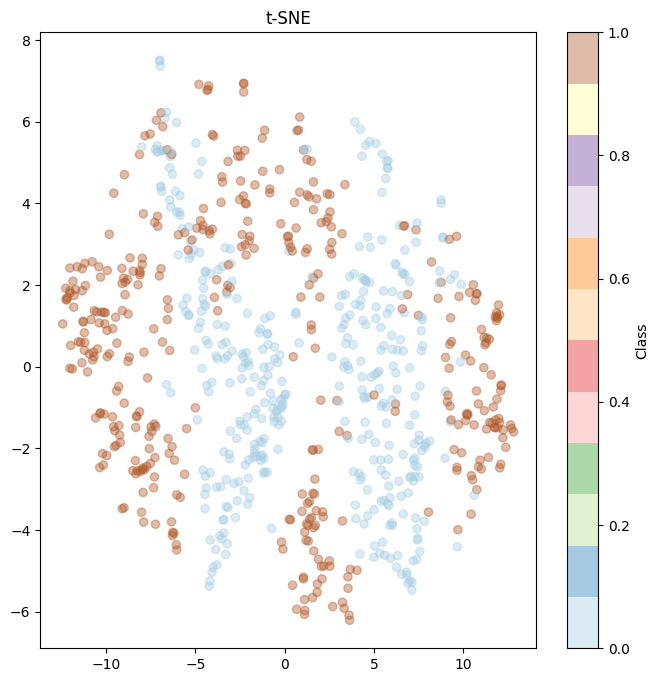

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# Create the figure
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, title='t-SNE')

# Assuming tsne_results is already defined from the previous code
scatter = ax.scatter(
    x=tsne_results[:, 0],
    y=tsne_results[:, 1],
    c=y_train,
    cmap=plt.cm.get_cmap('Paired'),
    alpha=0.4
)

# Add color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Class')

plt.show()


In [ ]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score
from sklearn.decomposition import PCA

# Assuming evaluate_model function looks something like this:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    # The error arises here with how ROC AUC is calculated, so handling needs to be specific
    if len(set(y_train)) > 2:  # Check if it's a multiclass problem
        roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')
    else:
        roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    print(f'ROC AUC Score: {roc_auc}')

# Initialize standard scaler
scaler = StandardScaler()

# Apply degree=2 to polynomial features with interaction_only=True
poly = PolynomialFeatures(degree=2, interaction_only=True)

# Initialize PCA
pca = PCA(n_components=21)

# Create a logistic regression model without regularization but with balanced class weights
logr = LogisticRegression(solver='lbfgs', class_weight='balanced', penalty='none', multi_class='ovr')

# Create a pipeline with polynomial features, PCA, standard scaler, and logistic regression model
pipe = Pipeline([
    ('poly', poly),
    ('pca', pca),
    ('scaler', scaler),
    ('logr', logr)
])

# Example data - replace X_train, y_train, X_test, y_test with your actual data
# evaluate_model(pipe, X_train, y_train, X_test, y_test)


In [ ]:
# Assuming X_train, y_train, X_test, and y_test are defined with your actual data
# Assuming pipe is the pipeline you've defined with polynomial features, PCA, scaler, and logistic regression

# Fit the pipeline on the training data
pipe.fit(X_train, y_train)

# Predict on the test data
predictions = pipe.predict(X_test)

# Print the output
print("Predicted Output:")
print(predictions)


Predicted Output:
[1 1 0 1 0 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0
 0 1 0 1 1 1 0 0 1 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0 1
 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 1 1 0 1 1
 0 1 0 1 0 1 1 0 1 1 1 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0 1
 0 0 1 0 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 0 0 0 1 1 0 0
 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning:

`penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
import time

# Generate synthetic data for the example
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=88)

# Perform PCA
time_start_pca = time.time()
pca = PCA(n_components=10)  # Adjust n_components as needed
X_train_pca = pca.fit_transform(X_train)
print('PCA done! Time elapsed: {} seconds'.format(time.time() - time_start_pca))

# Initialize model components
scaler = StandardScaler()
log_reg = LogisticRegression(class_weight='balanced', solver='lbfgs', random_state=88)

# Pipeline with PCA
pipe = Pipeline([
    ('scaler', scaler),
    ('pca', pca),
    ('log_reg', log_reg)
])

# Parameters to search over
param_dist = {
    'log_reg__C': [0.1, 1, 10]  # Adjust C values as needed
}

# Validator
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=88)

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    pipe,
    param_distributions=param_dist,
    n_iter=10,
    scoring=['precision', 'recall', 'f1', 'balanced_accuracy', 'roc_auc'],
    refit='balanced_accuracy',
    cv=cv,
    random_state=88,
    n_jobs=-1
)

# Fit the randomized search using the PCA-transformed training data
random_search.fit(X_train_pca, y_train)

# Retrieve best parameters for the logistic regression
print(random_search.best_params_)

# Retrieve best score
print(random_search.best_score_)


PCA done! Time elapsed: 0.02626824378967285 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning:

The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.



{'log_reg__C': 10}
0.8374431336263397


In [ ]:
import time
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
import pandas as pd

# Generate synthetic data for the example
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=88)

# Perform t-SNE
time_start_tsne = time.time()
tsne = TSNE(n_iter=300, n_components=2, perplexity=30, random_state=10)

# Check if X_train is a DataFrame and convert if necessary
if isinstance(X_train, pd.DataFrame):
    X_train_array = X_train.values
else:
    X_train_array = X_train

tsne_results = tsne.fit_transform(X_train_array)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time() - time_start_tsne))

# Initialize model components
scaler = StandardScaler()
log_reg = LogisticRegression(class_weight='balanced', solver='lbfgs', random_state=88)

# Pipeline with t-SNE
pipe = Pipeline([
    ('scaler', scaler),
    ('tsne', tsne),
    ('log_reg', log_reg)
])

# Parameters to search over
param_dist = {
    'log_reg__C': [0.1, 1, 10]  # Adjust C values as needed
}

# Validator
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=88)

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    pipe,
    param_distributions=param_dist,
    n_iter=10,
    scoring=['precision', 'recall', 'f1', 'balanced_accuracy', 'roc_auc'],
    refit='balanced_accuracy',
    cv=cv,
    random_state=88,
    n_jobs=-1
)

# Fit the randomized search using the t-SNE-transformed training data
random_search.fit(tsne_results, y_train)

# Retrieve best parameters for the logistic regression
print(random_search.best_params_)

# Retrieve best score
print(random_search.best_score_)


t-SNE done! Time elapsed: 4.13833475112915 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning:

The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.



ValueError: 
All the 9 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 401, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 339, in _fit
    self._validate_steps()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 230, in _validate_steps
    raise TypeError(
TypeError: All intermediate steps should be transformers and implement fit and transform or be the string 'passthrough' 'TSNE(n_iter=300, perplexity=30, random_state=10)' (type <class 'sklearn.manifold._t_sne.TSNE'>) doesn't


<ipython-input-95-5d2de4e86e33>:13: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



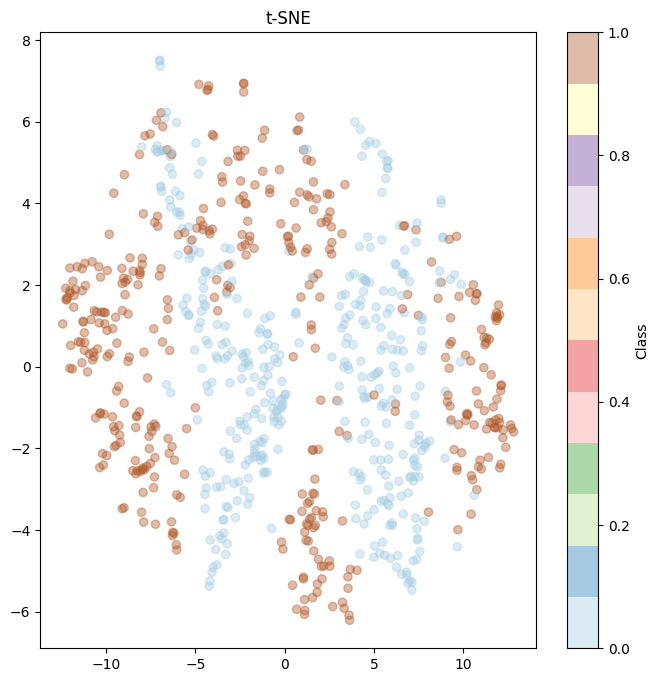

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# Create the figure
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, title='t-SNE')

# Assuming tsne_results is already defined from the previous code
scatter = ax.scatter(
    x=tsne_results[:, 0],
    y=tsne_results[:, 1],
    c=y_train,
    cmap=plt.cm.get_cmap('Paired'),
    alpha=0.4
)

# Add color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Class')

plt.show()
